# FIT5149 Assignment - 1 :- Predicting critical temperature of  superconductors



Student information
- Family Name: Mohamed Hayath
- Given Name: Mohaab Hassan
- Student ID: 29626889
- Student email: mmoh0064@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplot2
- dplyr
- psych
- reshape2
- RFmarkerDetector
- GGally
- corrplot
- caret
- pedometrics
- car
- mctest
- randomForest
- xgboost
- saeRobust
- ggcorrplot
- tidyverse
- dvisc
- glmnet
## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Variable Identification and Explanation](#sec_3)
* [Model Development](#sec_4)
* [Model Comparison](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

### In the first assignment of this unit, we are asked to predict critical temperature of superconductors given its properties. On a brief note, we are required to perform two tasks which will be carried out in this notebook,
#### 1] Predict the critical temperature Tc given some chemical properties of a material
#### 2] Explain your prediction and the associated findings? For example, describe the key properties associated with the response variable.
### To begin, we are provided a dataset from the superconducting material database maintained by Japan's National Institute for Material Science. So we begin by reading the data set into R and importing all required libraries for model building and processing the data.

In [1]:
library('ggplot2')
library('dplyr')
library('GGally')
library('corrplot')
library('caret')
library('car')
library('mctest')
library('randomForest')
library('xgboost')
library('leaps')
library('MASS')
library('tidyverse')
library('glmnet')
library('ggcorrplot')
options(warn=-1)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin


Attaching package: 'xgboost'

The following object is masked 

#### We now read the dataset using the read.csv command in R

In [2]:
data <- read.csv('train.csv')

In [3]:
head(data)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [4]:
glimpse(data)

Observations: 21,263
Variables: 82
$ number_of_elements              <int> 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,...
$ mean_atomic_mass                <dbl> 88.94447, 92.72921, 88.94447, 88.94...
$ wtd_mean_atomic_mass            <dbl> 57.86269, 58.51842, 57.88524, 57.87...
$ gmean_atomic_mass               <dbl> 66.36159, 73.13279, 66.36159, 66.36...
$ wtd_gmean_atomic_mass           <dbl> 36.11661, 36.39660, 36.12251, 36.11...
$ entropy_atomic_mass             <dbl> 1.181795, 1.449309, 1.181795, 1.181...
$ wtd_entropy_atomic_mass         <dbl> 1.0623955, 1.0577551, 0.9759805, 1....
$ range_atomic_mass               <dbl> 122.9061, 122.9061, 122.9061, 122.9...
$ wtd_range_atomic_mass           <dbl> 31.79492, 36.16194, 35.74110, 33.76...
$ std_atomic_mass                 <dbl> 51.96883, 47.09463, 51.96883, 51.96...
$ wtd_std_atomic_mass             <dbl> 53.62253, 53.97987, 53.65627, 53.63...
$ mean_fie                        <dbl> 775.425, 766.440, 775.425, 775.425,...
$ wtd_mean_fie   

### The dataset consists of 21,263 observations with 83 columns/features. 
### As specified in the description of the assignment, the data consists mainly of the following properties of elements,
Number of elements :- Indicates number of elements for each row. <br>
Atomic Mass :- The mass of an atom of a chemical element expressed in atomic mass units. It is approximately equivalent to the number of protons and neutrons in the atom. <br>
First Ionization Energy :-  The minimum amount of energy required to remove the most loosely bound electron, the valence electron, of an isolated neutral gaseous atom or molecule. <br>
Atomic Radius :- The atomic radius of a chemical element is a measure of the size of its atoms, usually the mean or typical distance from the center of the nucleus to the boundary of the surrounding shells of electrons. <br>
Density :- The density, or more precisely, the volumetric mass density, of a substance is its mass per unit volume. <br>
Electron Affinity :-  The electron affinity of an atom or molecule is defined as the amount of energy released or spent when an electron is added to a neutral atom or molecule in the gaseous state to form a negative ion. <br>
Fusion Heat :- The change in an atom's enthalpy resulting from providing energy, typically heat, to a specific quantity of the substance to change its state from a solid to a liquid, at constant pressure. <br>
Thermal Conductivity :- A measure of an atom's ability to conduct heat. It is commonly denoted by, or. Heat transfer occurs at a lower rate in materials of low thermal conductivity than in materials of high thermal conductivity. <br>
Valence :-  A valence electron is an outer shell electron that is associated with an atom, and that can participate in the formation of a chemical bond if the outer shell is not closed; in a single covalent bond, both atoms in the bond contribute one valence electron in order to form a shared pair.<br>

### For each of the above properties, we are provided with ten features for the element properties,

Mean :- The central value of a discrete set of numbers. <br>
Weighted mean :- The geographic center of a set of points as adjusted for the influence of a value associated with each point.<br>
Geometric mean :- The geometric mean is a mean or average, which indicates the central tendency or typical value of a set of numbers by using the product of their values.<br>
Weighted geometric mean :- If we introduce additional weights in calculation to the geometric mean, we obtain weighted geometric mean.<br>
Entropy :- A thermodynamic quantity representing the unavailability of a system's thermal energy for conversion into mechanical work, often interpreted as the degree of disorder or randomness in the system.<br>
Weighted entropy :- Weighted entropy is the measure of information supplied by a probablistic experiment whose elementary events are characterized both by their objective probabilities and by some qualitative (objective or subjective) weights.
Range :-  Set of difference between the largest and smallest value. <br>
Weighted range :- Similar to calculating range but with addition of some weights.<br>
Standard deviation :- A quantity expressing by how much the members of a group differ from the mean value for the group.<br>
Weighted standard deviation :- A weighted standard deviation allows you to apply a weight, or relative significance to each value in a set of values. Values with a higher value for their weight are considered as more significant to a sample as compared to the other values in a sample.<br>

#### To begin with, we will first randomly spit the data to training and testing with a 80:20 split.

In [5]:
set.seed(123)
# Random sample indexes
train_index <- sample(1:nrow(data), 0.8 * nrow(data))
test_index <- setdiff(1:nrow(data), train_index)

# Build X_train, y_train, X_test, y_test
train_data <- data[train_index, ]
test_data <- data[test_index,]



As shown from the output indices below, we can see that the data is split randomly to train and test and their dimensions add up to the dimension of the dataset provided. Thus, we have succesfully created a train/test split. Moving further, we will now work with the training data to perform EDA, feature selection and model buiding and test it on the testing data.

In [6]:
head(train_data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
18847,6,60.60051,71.50999,46.72851,55.49176,1.5674431,1.219687,122.90607,34.54220,40.99217,...,3.225625,2.667168,3.024633,1.692020,1.3798055,4,1.2375000,1.2909944,1.1334542,24.0
18895,4,57.44445,60.35930,56.06791,58.81637,1.3627753,1.035615,34.84360,29.26144,12.36749,...,3.612000,3.309751,3.405193,1.333736,0.9933449,3,1.9520000,1.1180340,1.1989395,15.5
2986,6,84.71115,78.84015,66.61372,64.69108,1.6109227,1.503995,122.90607,24.94837,47.66921,...,2.142857,2.139826,2.119268,1.778233,1.5841000,1,0.7428571,0.3726780,0.3499271,45.3
1842,7,112.95469,60.86673,82.42970,36.81151,1.7077125,1.706145,192.98100,19.45715,74.49495,...,2.383333,2.667097,2.256988,1.874063,1.5394896,3,1.0266667,1.1248583,0.9572820,94.0
3371,6,78.67813,59.21927,58.87964,36.12306,1.5198817,1.376040,192.98100,27.82682,62.21946,...,2.400667,2.492883,2.260508,1.717076,1.3702158,3,1.0646667,1.1055416,1.0198691,74.1
11638,3,49.59452,37.84410,37.11177,24.83395,0.8757052,0.877500,76.89515,19.14960,31.41607,...,3.720000,3.634241,3.690431,1.090060,0.8829809,1,1.9200000,0.4714045,0.4489989,12.9


In [7]:
head(test_data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
3,4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.1142857,0.4330127,0.4446966,19.0
8,4,76.51772,57.17514,59.31010,35.89137,1.197273,0.9435605,122.9061,36.45120,44.28946,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.1142857,0.4330127,0.4446966,33.0
12,5,111.27357,63.71346,82.79332,37.93423,1.409442,1.3354724,184.5906,27.84874,64.45900,...,2.242857,2.168944,2.206963,1.594167,1.173869,1,1.0571429,0.4000000,0.4288095,26.0
24,4,76.51772,55.70984,59.31010,35.42195,1.197273,1.0777829,122.9061,29.97904,44.28946,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.0571429,0.4330127,0.4288095,18.2
34,4,76.44456,65.83465,59.35667,48.95599,1.199541,1.2418667,121.3276,22.13227,43.82335,...,2.133333,2.213364,2.111100,1.368922,1.354710,1,0.2666667,0.4330127,0.3399346,90.5
35,4,96.03285,77.27947,69.51593,53.61112,1.159784,1.2674517,151.2596,22.54337,59.66389,...,2.166667,2.213364,2.139826,1.368922,1.351681,1,0.3333333,0.4330127,0.3726780,92.0


In [8]:
dim(train_data)

[1] 17010    82

In [9]:
dim(test_data)

[1] 4253   82

In [10]:
dim(data)

[1] 21263    82

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

#### In this section, we will perform some exploratory analysis on the dataset, followed by using some filter methods to get rid of unnecessary features. In brief, we will be making use of 3 filter methods to get rid of unneccessary features,
* Removing features with more than 50% NA values.
* Removing features with low variance(10%).
* Removing highly correlated features.

#### We begin with searching for any NA/null values in the dataset.


In [11]:
sum(is.na(train_data))

[1] 0

As we can see, we don't have any missing data in the dataset. We can now proceed to the next section where we check for variables with low variance.

#### We now check for features which have low variance. This can be done by using the nearZeroVar function from the caret package  and filter our variables to remove those which have less than 10% variance.

In [12]:
x <- nearZeroVar(train_data, saveMetrics = TRUE)
x[x$percentUnique<10,]
x_new <- x[x$percentUnique>10,] # Filters out variables with variance below 10%.


,freqRatio,percentUnique,zeroVar,nzv
number_of_elements,1.292273,0.05291005,FALSE,FALSE
range_atomic_mass,1.023551,5.82010582,FALSE,FALSE
range_fie,3.018448,4.78542034,FALSE,FALSE
mean_atomic_radius,1.617886,5.39682540,FALSE,FALSE
range_atomic_radius,1.958866,1.13462669,FALSE,FALSE
range_Density,4.253769,4.95590829,FALSE,FALSE
range_ElectronAffinity,1.122555,3.64491476,FALSE,FALSE
range_FusionHeat,13.266385,3.34509112,FALSE,FALSE
range_ThermalConductivity,23.618234,2.56907701,FALSE,TRUE
mean_Valence,1.025624,0.36449148,FALSE,FALSE


In [13]:
features<-rownames(x_new) # we assign the names of the features to a variable so as to get rid of the features with low variance

In [14]:
data_train_sub<-train_data[, (colnames(train_data) %in% features)] # subset the data 
dim(data_train_sub)

[1] 17010    68

#### We now proceed by removing highly correlated variables from the dataset. Removal of highly correlated variables is pivotal as correlation implies that there is little information contained in any linear combination of the concerned features. Removing the correlation by reducing the number of features can be seen to smooth out noise and simplify the model.
We begin by creating a correlation matrix of the data(after removing low variance variables).

In [15]:
correlation_matrix <- cor(data_train_sub)

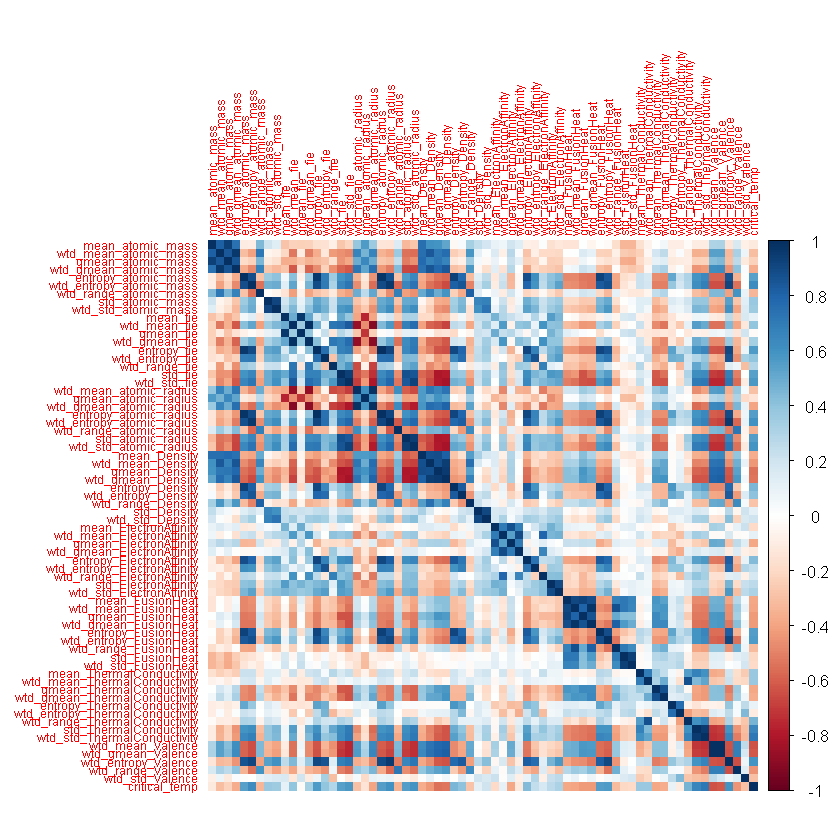

In [16]:
corrplot(correlation_matrix, method="color",tl.cex = 0.6)


As seen from above, there seem to be a lot of highly correlated features which will lead to more noise and hence hinder the model performance. However, the above plot looks really clumsy due to a large number of features present in the dataset. Thus to make it more simpler, we will create multiple correlation plots with the properties of the elements.

In [17]:
atomic_mass <- data_train_sub %>% dplyr::select(contains("atomic_mass"))
fie <- data_train_sub %>% dplyr::select(contains("fie"))
atomic_radius <- data_train_sub %>% dplyr::select(contains("atomic_radius"))
density <- data_train_sub %>% dplyr::select(contains("Density"))
electron_affinity <- data_train_sub %>% dplyr::select(contains("ElectronAffinity"))
fusion_heat <- data_train_sub %>% dplyr::select(contains("FusionHeat"))
thermal_conductivity <- data_train_sub %>% dplyr::select(contains("ThermalConductivity"))
valence <- data_train_sub %>% dplyr::select(contains("Valence"))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


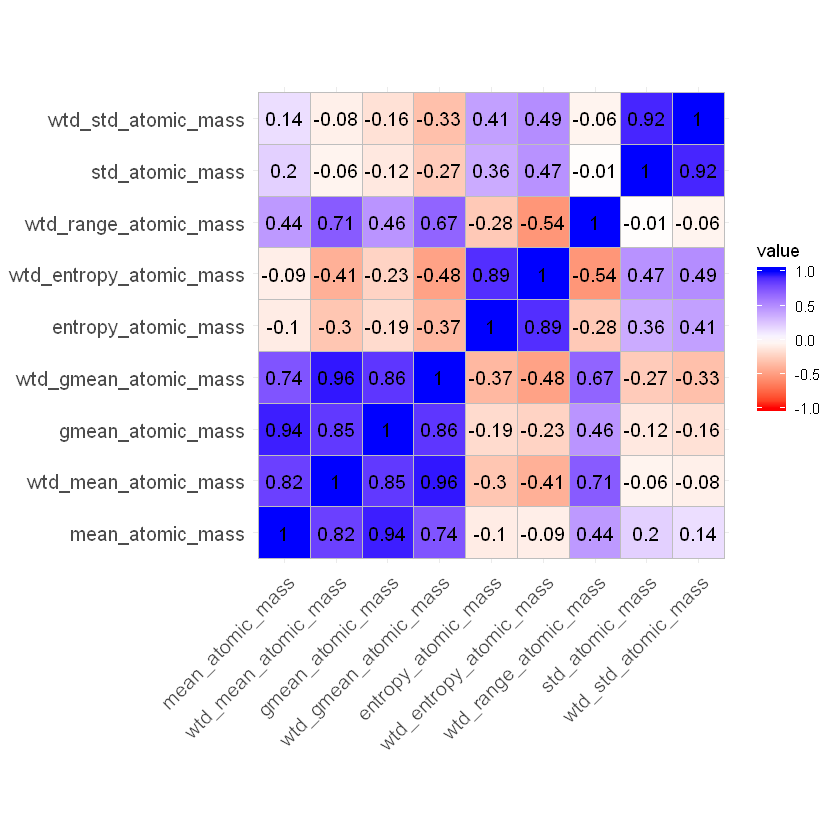

In [18]:
ggcorrplot(cor(atomic_mass),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


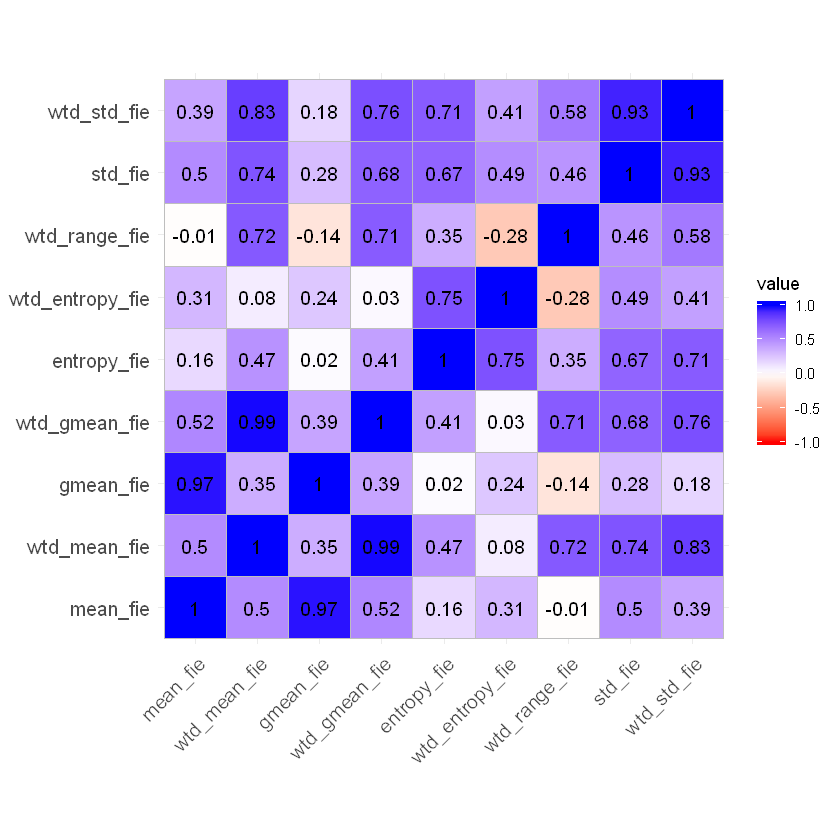

In [19]:
ggcorrplot(cor(fie),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


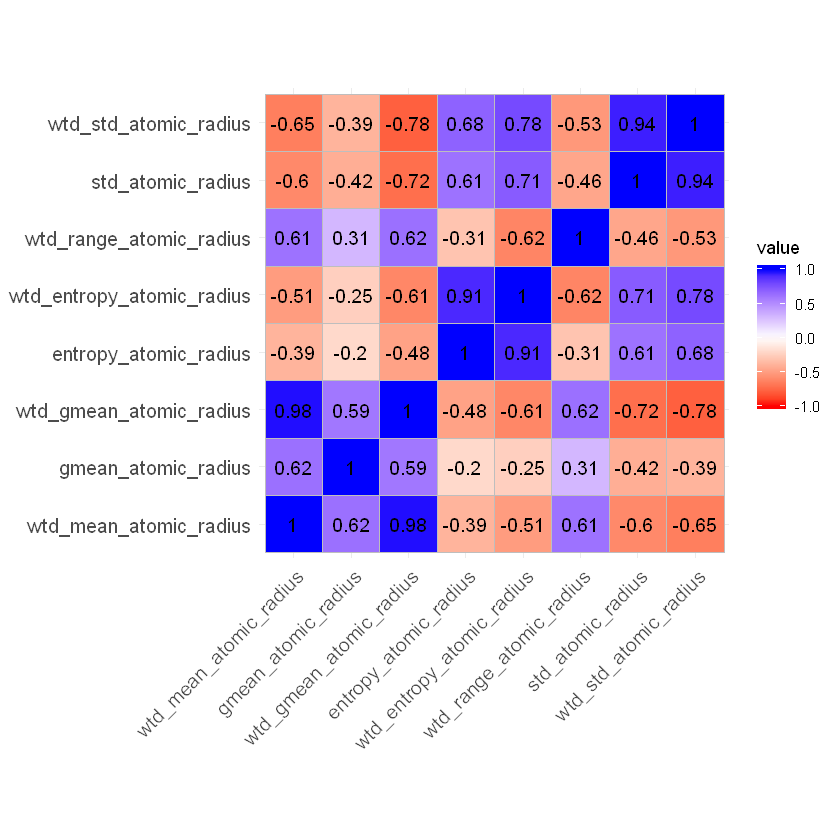

In [20]:
ggcorrplot(cor(atomic_radius),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


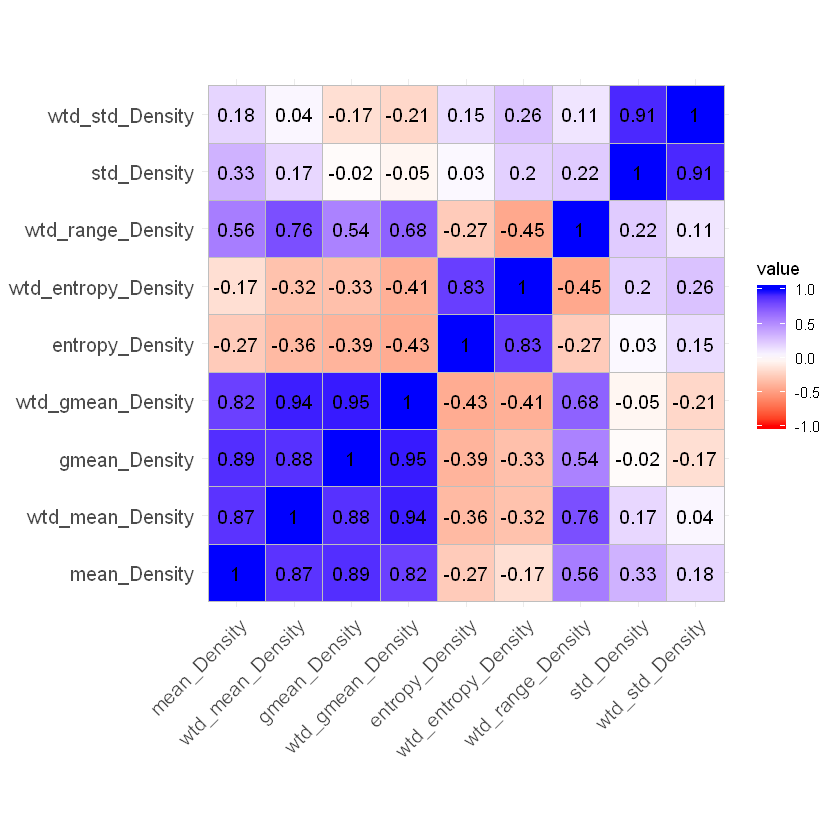

In [21]:
ggcorrplot(cor(density),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


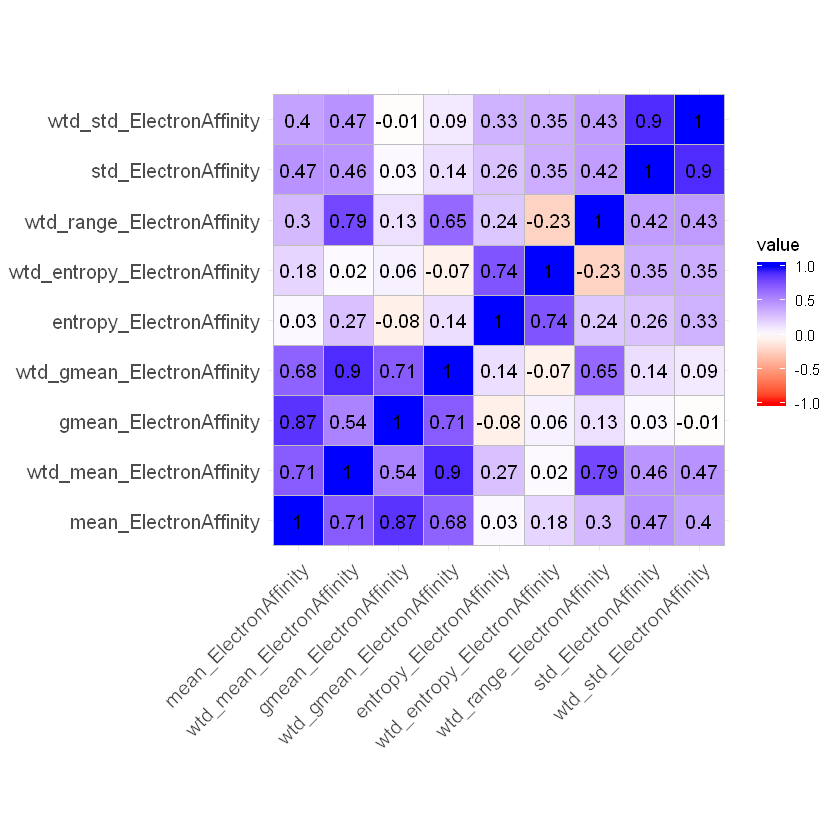

In [22]:
ggcorrplot(cor(electron_affinity),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


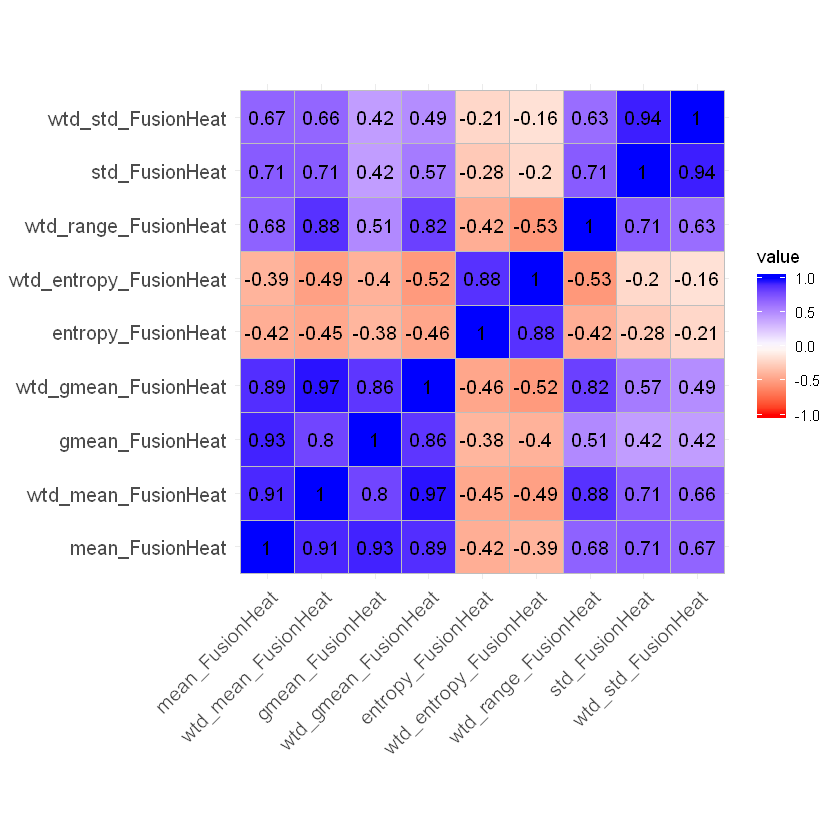

In [23]:
ggcorrplot(cor(fusion_heat),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


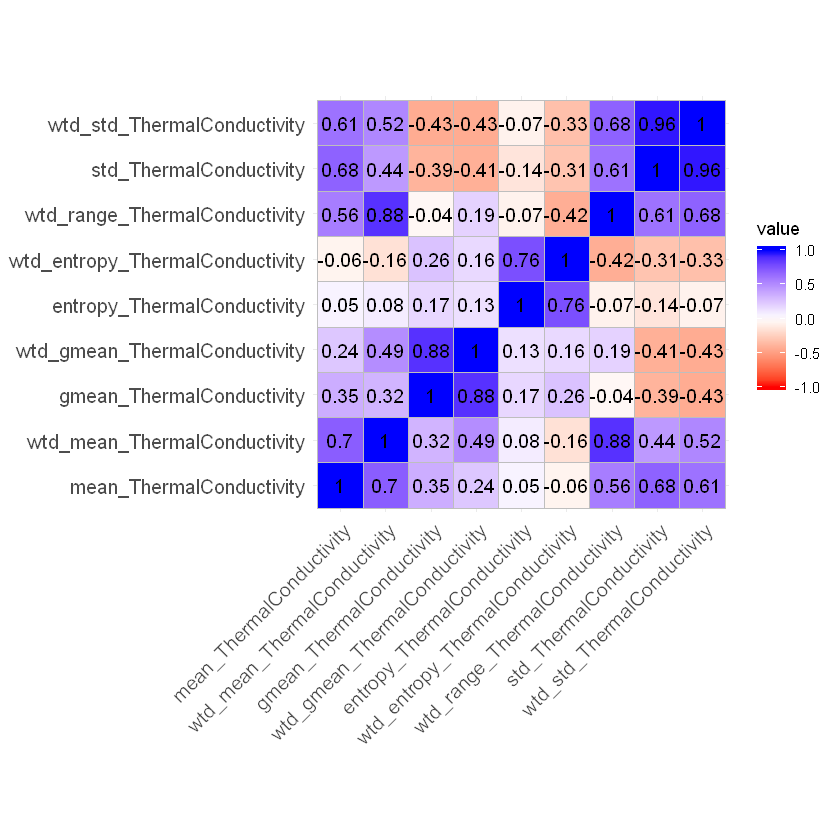

In [24]:
ggcorrplot(cor(thermal_conductivity),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


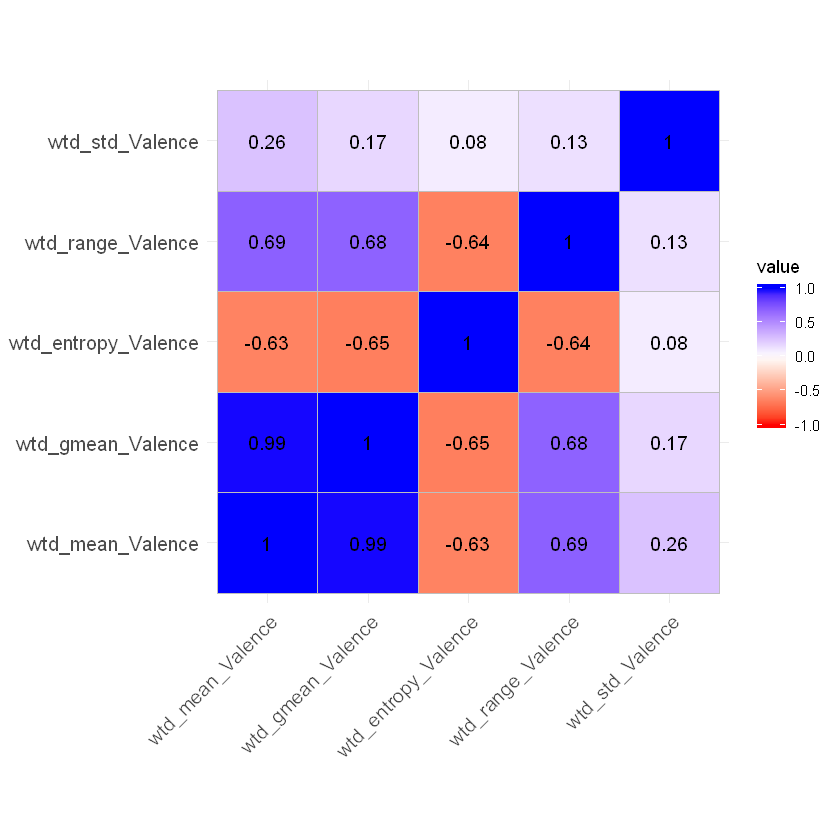

In [25]:
ggcorrplot(cor(valence),lab = TRUE,colors="blue") + scale_fill_gradient2(limit = c(-1,1), low = "red", high =  "blue", mid = "white", midpoint = 0)

One major trend in the above correlation plots is the high correlation between weighted standard deviation and standard deviation of the properties. There is also a high correlation between different measurements of mean(mean, weighted mean, geometric mean and weighted geometric mean) in atomic mass, fusion heat, electron affinity and density. 

To remove highly correlated features, we will however use the first correlation matrix as it contains the interaction of the feature with all the other features.
Thus, to get rid of these features, we use a function from the caret package, which is findCorrelation. The function searches for absolute values of pair-wise correlations. If variables have a high correlation, the function looks at the mean absolute correlation of each variable and removes the variable with the largest mean absolute correlation. We have a set a cutoff at 0.8, which means any set of variables that have a correlation of 0.8 or more, we will retain only one such feature and get rid of the rest.

In [26]:
remove_features <- findCorrelation(correlation_matrix,cutoff = 0.8,names=TRUE)
remove_features

[1] "wtd_std_fie"                   "wtd_entropy_atomic_radius"    
 [3] "wtd_std_atomic_radius"         "wtd_gmean_Density"            
 [5] "wtd_entropy_atomic_mass"       "wtd_entropy_Valence"          
 [7] "std_fie"                       "entropy_fie"                  
 [9] "entropy_atomic_radius"         "gmean_Density"                
[11] "wtd_gmean_Valence"             "wtd_std_ThermalConductivity"  
[13] "entropy_atomic_mass"           "wtd_gmean_atomic_radius"      
[15] "wtd_entropy_FusionHeat"        "wtd_mean_fie"                 
[17] "entropy_ElectronAffinity"      "wtd_mean_Density"             
[19] "entropy_FusionHeat"            "wtd_mean_atomic_radius"       
[21] "wtd_gmean_atomic_mass"         "entropy_Density"              
[23] "wtd_gmean_FusionHeat"          "gmean_FusionHeat"             
[25] "wtd_gmean_ThermalConductivity" "wtd_entropy_fie"              
[27] "wtd_std_atomic_mass"           "wtd_std_ElectronAffinity"     
[29] "wtd_mean_atomic_mass"          "wtd_mean_FusionHeat"          
[31] "wtd_range_Density"             "gmean_atomic_mass"            
[33] "wtd_mean_ElectronAffinity"     "std_Density"                  
[35] "gmean_fie"                     "wtd_std_FusionHeat"           
[37] "mean_ElectronAffinity"         "wtd_mean_ThermalConductivity"

#### The above features are the highly correlated ones and below the code will subset the data further to exclude these features

In [27]:
data_train_split <- data_train_sub[, !(colnames(data_train_sub) %in% remove_features)]
dim(data_train_split)
test_data_split <- test_data[, (colnames(test_data) %in% colnames(data_train_split))]
dim(test_data_split)

[1] 17010    30

[1] 4253   30

### 3. Variable Identification and Explanation <a class="anchor" id="sec_3"></a>

#### We now perform model based feature selection, which is wrapper and embedded methods.


#### In our first approach, we build a stepwise linear regression model on the data. Step wise regression consists of iterative adding and removing predictors in order to find the subset of the predictors which results in best performance model. We will perform a backward regression i.e. beginning with a full model, we iteratively remove variables from the model tillwe optimize our model performance. 

#### I set the threshold at 10 as a decrease in number of features causes an increase in BIC and RSS and a decrease in the adjusted r squared. Increasing the number of features didn't have any significant impact either as the improvement was fairly constant. Thus, we set nvmax to 10.

In [28]:
regfit.full <- regsubsets(critical_temp ~ .,data=data_train_split,nvmax=10,method = 'backward')
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., data = data_train_split, 
    nvmax = 10, method = "backward")
29 Variables  (and intercept)
                                Forced in Forced out
mean_atomic_mass                    FALSE      FALSE
wtd_range_atomic_mass               FALSE      FALSE
std_atomic_mass                     FALSE      FALSE
mean_fie                            FALSE      FALSE
wtd_gmean_fie                       FALSE      FALSE
wtd_range_fie                       FALSE      FALSE
gmean_atomic_radius                 FALSE      FALSE
wtd_range_atomic_radius             FALSE      FALSE
std_atomic_radius                   FALSE      FALSE
mean_Density                        FALSE      FALSE
wtd_entropy_Density                 FALSE      FALSE
wtd_std_Density                     FALSE      FALSE
gmean_ElectronAffinity              FALSE      FALSE
wtd_gmean_ElectronAffinity          FALSE      FALSE
wtd_entropy_ElectronAffinity        FALSE   

In [29]:
mincp<-which.min(reg.summary$cp)
coef(regfit.full, mincp)



(Intercept)                      mean_fie 
                   2.47235315                    0.02284476 
      wtd_range_atomic_radius             std_atomic_radius 
                  -0.12464118                    0.34072660 
   wtd_gmean_ElectronAffinity                std_FusionHeat 
                  -0.23631893                   -0.50317654 
     mean_ThermalConductivity     gmean_ThermalConductivity 
                   0.24761863                   -0.29832262 
  entropy_ThermalConductivity wtd_range_ThermalConductivity 
                  17.95353623                    0.14811571 
              wtd_std_Valence 
                 -16.49510279

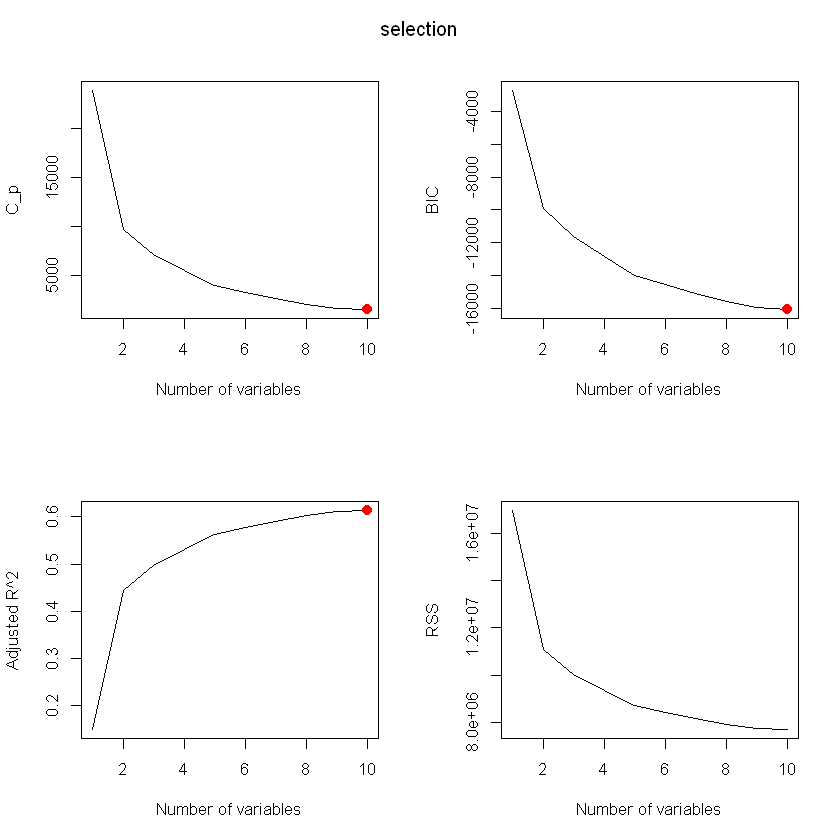

In [30]:
par(mfrow = c(2, 2))
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type ="l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type ="l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2,pch = 20)
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex =2, pch = 20)
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type ="l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise

selection", side = 3, line = -2, outer = TRUE)

The abve plot signifies the following measures,
- Mallow's CP :- This metric helps us to know how precise our model is in the prediciton. Lower the value, more precise the prediction.
- Bayesian information criterion(BIC) :- It is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. BIC attempts to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC. 
- Adjusted R-squared :- The adjusted r-square is a standardized indicator of r-square, adjusting for the number of predictor variables. This shows the standardized variance of the independent variables on the dependent variable in regression analysis. The adjusted r-square includes the degrees of freedom for the statistical model, which is the total number of variables minus one. 
- Residual sum of squares(RSS) :- The sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

As we can see from the above plots, when the number of variables is 10, RSS, BIC and CP are optimally minimum and ajusted r squared is maximum. Thus we can justify that our choice of 10 features is right. Below, we subset the data based on the features selected from regsubsets and pass it to a linear model later on.

In [31]:
features <- c('mean_fie','wtd_range_atomic_radius','std_atomic_radius','wtd_gmean_ElectronAffinity','std_FusionHeat','mean_ThermalConductivity','gmean_ThermalConductivity','entropy_ThermalConductivity','wtd_range_ThermalConductivity','wtd_std_Valence','critical_temp')
data_train_linearmodel <- data_train_split[,(colnames(data_train_split) %in% features)]

#### In our second approach, we will build a random forest classifier and use these features to build a XGboost model. 

#### Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. Permutation Importance or percentage increase in MSE is assessed for each feature by removing the association between that feature and the target. This is achieved by randomly permuting the values of the feature and measuring the resulting increase in error. The influence of the correlated features is also removed. If the percentage increase in MSE is high, removing that feature from the model will result in a higher increase of MSE which is not what we want. (This will take some time to run)

In [32]:
rf <- randomForest(critical_temp ~ ., data=data_train_split, importance=TRUE,
proximity=TRUE)

In [33]:
print(rf)


Call:
 randomForest(formula = critical_temp ~ ., data = data_train_split,      importance = TRUE, proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 88.90356
                    % Var explained: 92.41


In [34]:
importance(rf,type=1)

,%IncMSE
mean_atomic_mass,32.58546
wtd_range_atomic_mass,39.71077
std_atomic_mass,41.21903
mean_fie,35.27856
wtd_gmean_fie,31.62645
wtd_range_fie,29.37492
gmean_atomic_radius,27.91675
wtd_range_atomic_radius,40.61313
std_atomic_radius,22.84707
mean_Density,39.25698


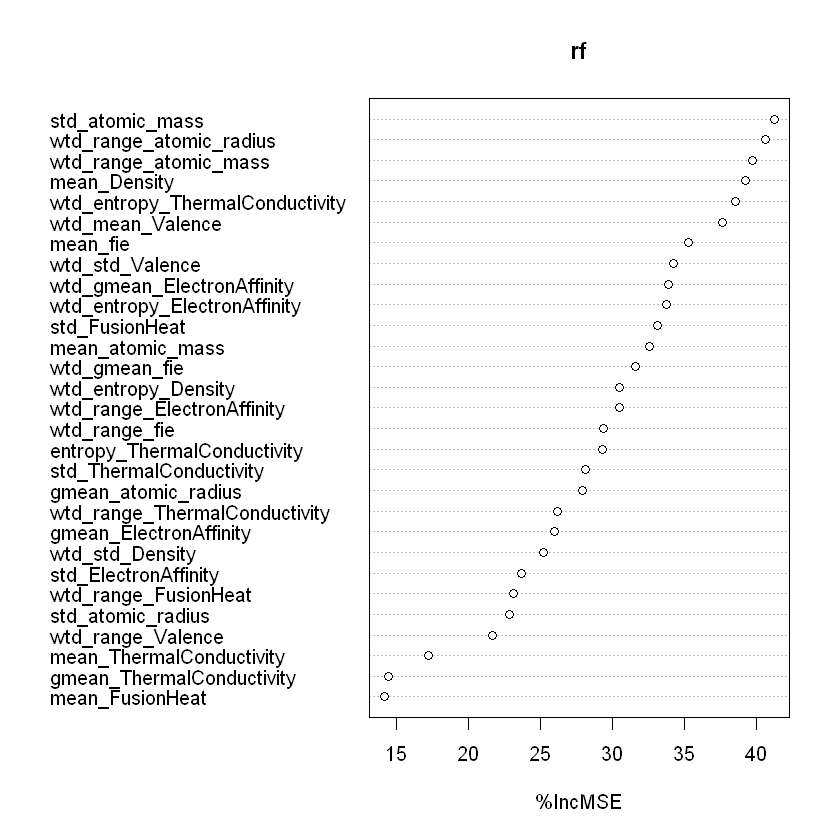

In [35]:
varImpPlot(rf,type=1)

As per the above explanation, as the %IncMSE increases, more important is the variable in the model. Thus as a threshold, we will keep 20 as a threshold and remove the features with a %IncMSE of less than 20.

In [36]:
features <- c('mean_FusionHeat','mean_ThermalConductivity','gmean_ThermalConductivity')

In [37]:
data_randomforest <- data_train_split[, !(colnames(data_train_split) %in% features)]

## 4. Model Development <a class="anchor" id="sec_4"></a>

#### In this section of the assignment, we develop or train our models using the training data and test their performance on the test data. In essence we will be building 4 models,
 - XGBoost
 - Multiple linear regression
 - Lasso regression
 - Ridge regression   

We first begin with building an XGBoost model. XGBoost is an ensemble learning method. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms. We use predominantly decision trees as the base learner, followed by boosting. In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

Boosting consists of three simple steps:
An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
A new model h1 is fit to the residuals from the previous step
Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:
$$ F_{1}(x) = F_{0}(x) + h_{1}(x)$$
To improve the performance of F1, we could model after the residuals of F1 and create a new model F2:
$$ F_{2}(x) = F_{1}(x) + h_{2}(x)$$

The exciting part of XGBoost which results in a high accuracy and consistency for majority of tasks i s in the optimization of the objective function. XGBoost uses gradient descent to optimize its loss function. As seen above, $h_{m}(x)$ represents the mean residual at each terminal node of the tree. In gradient boosting, the average gradient component would be computed.

The following steps are involved in gradient boosting:
 - F0(x) – with which we initialize the boosting algorithm 

 - The gradient of the loss function is computed iteratively

 - Each hm(x) is fit on the gradient obtained at each step

 - The multiplicative factor γm for each terminal node is derived and the boosted model Fm(x) is defined

This is what makes XGBoost so accurate and consistent. For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling.

Below, we implement the XGBoost algorithm on the subset generated from the random forest. We require to convert the train and test data to a xgb.DMatrix as it is recommended from the xgboost library.

In [38]:
feature_names <- names(data_randomforest)

In [39]:
colnames(data_randomforest)

[1] "mean_atomic_mass"                "wtd_range_atomic_mass"          
 [3] "std_atomic_mass"                 "mean_fie"                       
 [5] "wtd_gmean_fie"                   "wtd_range_fie"                  
 [7] "gmean_atomic_radius"             "wtd_range_atomic_radius"        
 [9] "std_atomic_radius"               "mean_Density"                   
[11] "wtd_entropy_Density"             "wtd_std_Density"                
[13] "gmean_ElectronAffinity"          "wtd_gmean_ElectronAffinity"     
[15] "wtd_entropy_ElectronAffinity"    "wtd_range_ElectronAffinity"     
[17] "std_ElectronAffinity"            "wtd_range_FusionHeat"           
[19] "std_FusionHeat"                  "entropy_ThermalConductivity"    
[21] "wtd_entropy_ThermalConductivity" "wtd_range_ThermalConductivity"  
[23] "std_ThermalConductivity"         "wtd_mean_Valence"               
[25] "wtd_range_Valence"               "wtd_std_Valence"                
[27] "critical_temp"

In [40]:
set.seed(123)
test_data_clean <- test_data[,(colnames(test_data) %in% colnames(data_randomforest))]

In [41]:
set.seed(123)
dtrain <- xgb.DMatrix(data=as.matrix(data_randomforest),label=data_randomforest$critical_temp)
dtest <- xgb.DMatrix(data=as.matrix( test_data_clean), label=test_data_clean$critical_temp)


Below, we initialize a list of parameters which we will pass to the XGBoost function. These consists of :-
- Booster which is linear
- Ojective which is linear regresison
- number of sub samples
- maximum depth of trees
- Number of samples by trees
- eta which is the learning rate for gradient descent
- eval metric which is a measure of performance; in this case we choose rmse
- minimum child weight

In [42]:
param <- list(booster = "gblinear"
              , objective = "reg:linear"
              , subsample = 0.5
              , max_depth = 16
              , colsample_bytree = 0.8
              , eta = 0.02
              , eval_metric = 'rmse'
              , min_child_weight = 1)

Below, we will cross validate the model on the train data set to get our optimum number of rounds for which the xgboost performs the best.

In [43]:
xgb_cv <- xgb.cv(data=dtrain,
                 params=param,
                nrounds=100,
                prediction=TRUE,
                maximize=FALSE,
                nfold=10,
                early_stopping_rounds = 30,
                print_every_n = 5
)

[1]	train-rmse:39.446626+0.052997	test-rmse:39.443740+0.505365 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[6]	train-rmse:29.553819+0.037648	test-rmse:29.553096+0.355522 
[11]	train-rmse:26.526614+0.031931	test-rmse:26.526803+0.317921 
[16]	train-rmse:24.115647+0.027572	test-rmse:24.116138+0.295720 
[21]	train-rmse:22.155151+0.024911	test-rmse:22.156043+0.275684 
[26]	train-rmse:20.557287+0.022717	test-rmse:20.558515+0.257819 
[31]	train-rmse:19.248179+0.021390	test-rmse:19.249719+0.241547 
[36]	train-rmse:18.166839+0.020399	test-rmse:18.168588+0.227672 
[41]	train-rmse:17.264384+0.019277	test-rmse:17.266402+0.216453 
[46]	train-rmse:16.501634+0.018774	test-rmse:16.503846+0.206884 
[51]	train-rmse:15.847588+0.018129	test-rmse:15.849993+0.199515 
[56]	train-rmse:15.278636+0.017721	test-rmse:15.281219+0.193703 
[61]	train-rmse:14.776235+0.017366	test-rmse:14.779015+0.189059 
[66]	train-rmse:14.326460

In [44]:
nrounds <- xgb_cv$best_iteration


We now train the model on training dataset with the best parameters.

In [45]:
xgb <- xgb.train(params = param
                 , data = dtrain
                 , nrounds = nrounds
                 , verbose = 1
                 , print_every_n = 5
                )

We now predict on the test data set.

In [46]:
preds_test <- predict(xgb,slice(dtest,1:4253))

In [47]:
test_data_clean$predicted <- preds_test

Below we calculate the RMSE between the actual and predicted values for critical temperature for model comparison.

In [48]:
rmse_xgboost <- RMSE(test_data_clean$critical_temp,test_data_clean$predicted)

We calculate r-squared below for model comparison.

In [49]:
r_sq_xgboost <- (cor(test_data_clean$predicted, test_data_clean$critical_temp))^2


#### Multiple linear regression

We now build a multiple linear regression model from the subset generated from the first section of feature selection.

In [50]:
linear_model <- lm(critical_temp ~ .,data=data_train_linearmodel)
summary(linear_model)


Call:
lm(formula = critical_temp ~ ., data = data_train_linearmodel)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.573 -14.498  -0.941  14.532 202.389 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2.472353   1.849189   1.337    0.181    
mean_fie                        0.022845   0.002147  10.641   <2e-16 ***
wtd_range_atomic_radius        -0.124641   0.005523 -22.568   <2e-16 ***
std_atomic_radius               0.340727   0.011676  29.181   <2e-16 ***
wtd_gmean_ElectronAffinity     -0.236319   0.005534 -42.703   <2e-16 ***
std_FusionHeat                 -0.503177   0.022912 -21.961   <2e-16 ***
mean_ThermalConductivity        0.247619   0.006577  37.651   <2e-16 ***
gmean_ThermalConductivity      -0.298323   0.008348 -35.734   <2e-16 ***
entropy_ThermalConductivity    17.953536   0.575451  31.199   <2e-16 ***
wtd_range_ThermalConductivity   0.148116   0.005063  29.253   <2e-16 ***
wtd_std_Valence   

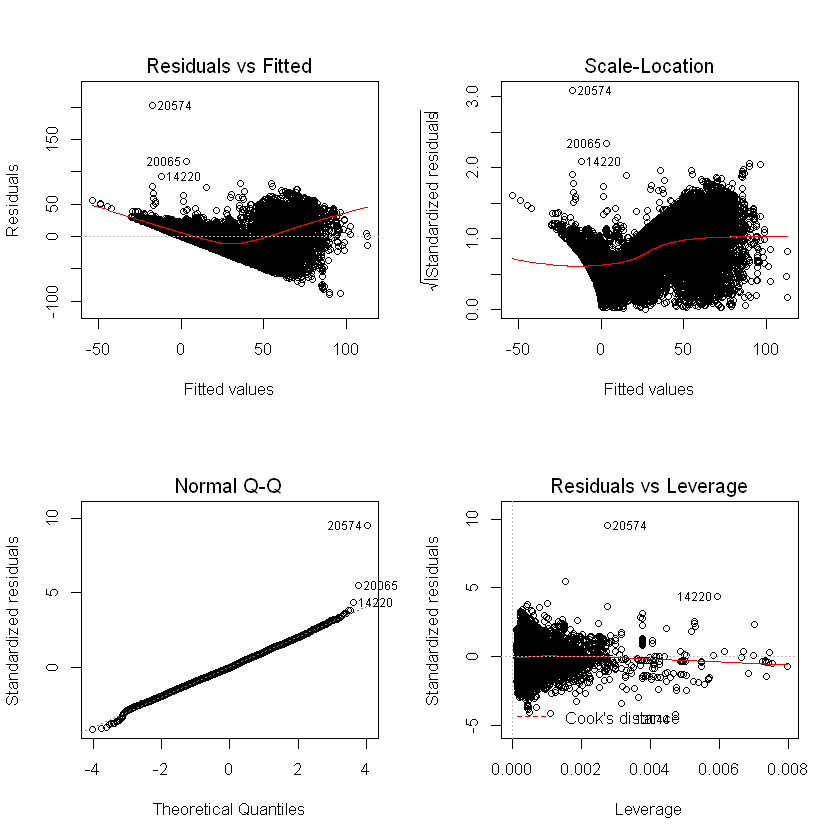

In [51]:
par(mfcol=c(2,2))
plot(linear_model)

From the above plot, we can make the following interpretations,
- The residual vs fitted plot tells us about the linear assumption. It shows if residuals have non-linear patterns. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you have linear relationships. However, if the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot if the model cannot capture the non-linearity. However, in this case, we can see that the residuals are not scattered evenly and this can lead to a non-linear relationship between critical temperature and our predictors.

- The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal. In the case of linear regression analysis, we assume that residual is normally distributed with constant variance and mean equal to zero. We can see that most residuals are normally distributed except for a few data points.

- The scale location plot is used to check for the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors. It is good if we can see a horizontal line with equally (randomly) spread points. The scale-location plot shows that the residuals appear randomly spread.It can be seen from the plot that the scale location plot is quite linear althought not being perfectly linear, thus giving a good reason for us to believe that the residuals are spread equally.

- The residual leverage plot helps us identify influential data samples. we look for outlying values at the upper right corner or at the lower right corner. Samples located in those places can be influential against a regression line.We use Cook's distance for indicating whether a sample is influential or not. When samples are influential, they are outside Cook's distance. However, in the plot, most of the points seem to be within this range and thus there are no influential cases observed. 

In [52]:
predictions <- predict(linear_model,test_data)

In [53]:
rmse_linearmodel <- RMSE(test_data$critical_temp,predictions)

In [54]:
r_sq_linearmodel <- summary(linear_model)$adj.r.squared

#### Ridge regression and Lasso regression
We now build a ridge regression to perform ordinary least squares regression. The main difference between OLS and ridge and lasso is that ridge and lasso adds a penalty term which shrinks the estimate of the coefficients towards zero for ridgewhile in lasso it may set some coefficients to 0. Below, we begin by building a ridge regression model followed by a lasso regression model. 

In [55]:
train.mat <- model.matrix(critical_temp ~ ., data = data_train_split)[,-1]
test.mat <- model.matrix(critical_temp ~ ., data = test_data_split)[,-1]

We create a sequence of values for lambda so that we can select the optimal value by cross validation on the training data set.

In [56]:
grid <- 10^seq(4, -2, length = 100)

We now fit a ridge regression model on the data, cross validate to get the best lambda values and predict on the test data set. This is done by passing the training data to glmnet function and setting alpha to 1.

In [57]:
fit.ridge <- glmnet(train.mat, train_data$critical_temp, alpha = 1, lambda = grid)
cv.ridge <- cv.glmnet(train.mat, train_data$critical_temp, alpha = 1, lambda = grid)
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 0.01149757

In [58]:
cv.ridge <- cv.glmnet(train.mat, train_data$critical_temp , alpha = 1)

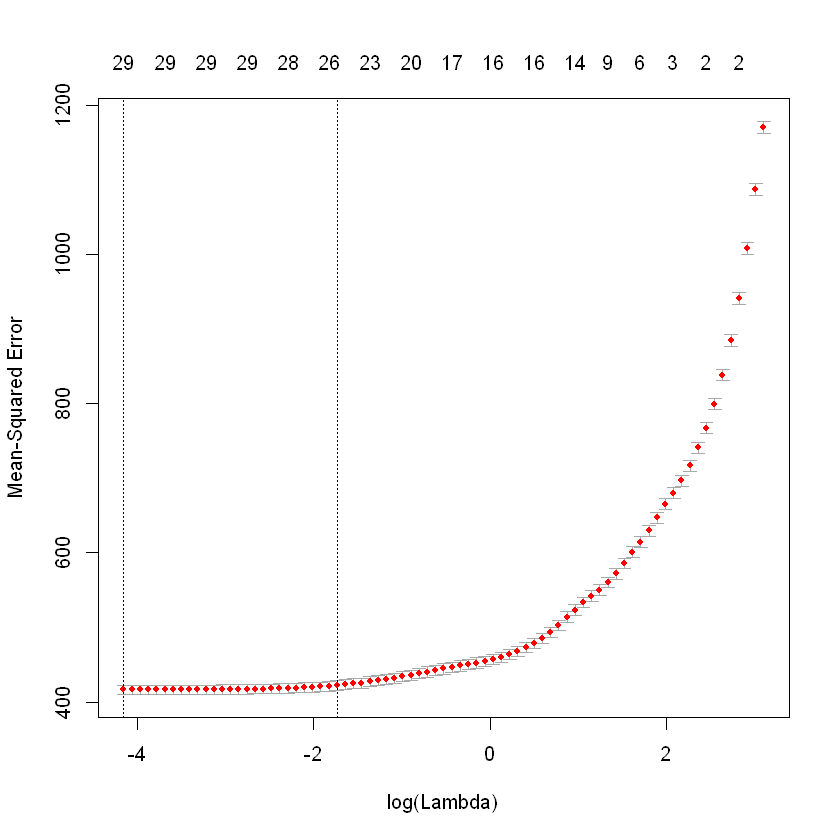

In [59]:
plot(cv.ridge)

We now pass the test data to the predict function in ridge regression and set lambda to the optimal value of 0.00114975699539774.

In [60]:
predict(fit.ridge, s = bestlam.ridge, type = "coefficients")

30 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                     -4.106479e+01
mean_atomic_mass                 1.598502e-01
wtd_range_atomic_mass           -7.582688e-02
std_atomic_mass                  2.220922e-01
mean_fie                         4.296083e-02
wtd_gmean_fie                    1.755980e-02
wtd_range_fie                   -1.934546e-02
gmean_atomic_radius              9.829875e-02
wtd_range_atomic_radius         -1.270657e-01
std_atomic_radius                3.157543e-01
mean_Density                    -2.352291e-03
wtd_entropy_Density              4.724817e-01
wtd_std_Density                 -9.759045e-04
gmean_ElectronAffinity           9.742414e-02
wtd_gmean_ElectronAffinity      -2.358783e-01
wtd_entropy_ElectronAffinity    -2.271874e+01
wtd_range_ElectronAffinity      -1.121972e-01
std_ElectronAffinity             1.130978e-01
mean_FusionHeat                  2.414484e-01
wtd_range_FusionHeat            -1.206

In [61]:
# prediction using ridge model for original test data
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
rmse_ridge <- RMSE(pred.ridge,test_data$critical_temp)
r_sq_ridge <- (cor(pred.ridge, test_data$critical_temp))^2

We now build a lasso regression model which is done by setting the value of alpha to 0.

In [62]:
fit.lasso <- glmnet(train.mat, train_data$critical_temp, alpha = 0, lambda = grid)
cv.lasso <- cv.glmnet(train.mat, train_data$critical_temp, alpha = 0, lambda = grid)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.02656088

In [63]:
cv.lasso <- cv.glmnet(train.mat, train_data$critical_temp , alpha = 0)

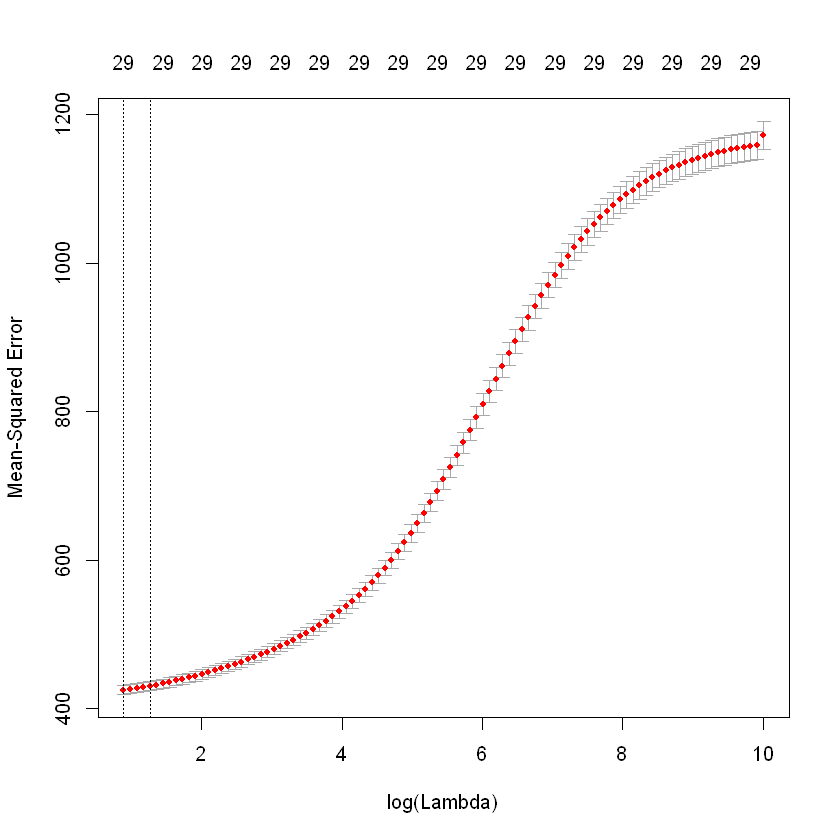

In [64]:
plot(cv.lasso)

In [65]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")

30 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                     -4.258620e+01
mean_atomic_mass                 1.618141e-01
wtd_range_atomic_mass           -7.662373e-02
std_atomic_mass                  2.236742e-01
mean_fie                         4.301589e-02
wtd_gmean_fie                    1.904295e-02
wtd_range_fie                   -2.007858e-02
gmean_atomic_radius              1.036252e-01
wtd_range_atomic_radius         -1.270026e-01
std_atomic_radius                3.163050e-01
mean_Density                    -2.383991e-03
wtd_entropy_Density              7.298661e-01
wtd_std_Density                 -9.869418e-04
gmean_ElectronAffinity           9.921545e-02
wtd_gmean_ElectronAffinity      -2.351682e-01
wtd_entropy_ElectronAffinity    -2.301404e+01
wtd_range_ElectronAffinity      -1.164011e-01
std_ElectronAffinity             1.151812e-01
mean_FusionHeat                  2.499184e-01
wtd_range_FusionHeat            -1.265

In [66]:
# prediction using ridge model for original test data
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
rmse_lasso <- RMSE(pred.lasso,test_data$critical_temp)
r_sq_lasso <- (cor(pred.lasso, test_data$critical_temp))^2

## 5. Model Comparison <a class="anchor" id="sec_5"></a>

We will now compare various error metrics of our model and derive which works best for our prediction. I have created three visualizations for RMSE, MSE and R-squared for the four models as shown below.

In [67]:
rmse <- c(rmse_lasso,rmse_linearmodel,rmse_ridge,rmse_xgboost)
r_squared <- c(r_sq_lasso,r_sq_linearmodel,r_sq_ridge,r_sq_xgboost)
mse <- c(rmse_lasso^2,rmse_linearmodel^2,rmse_ridge^2,rmse_xgboost^2)


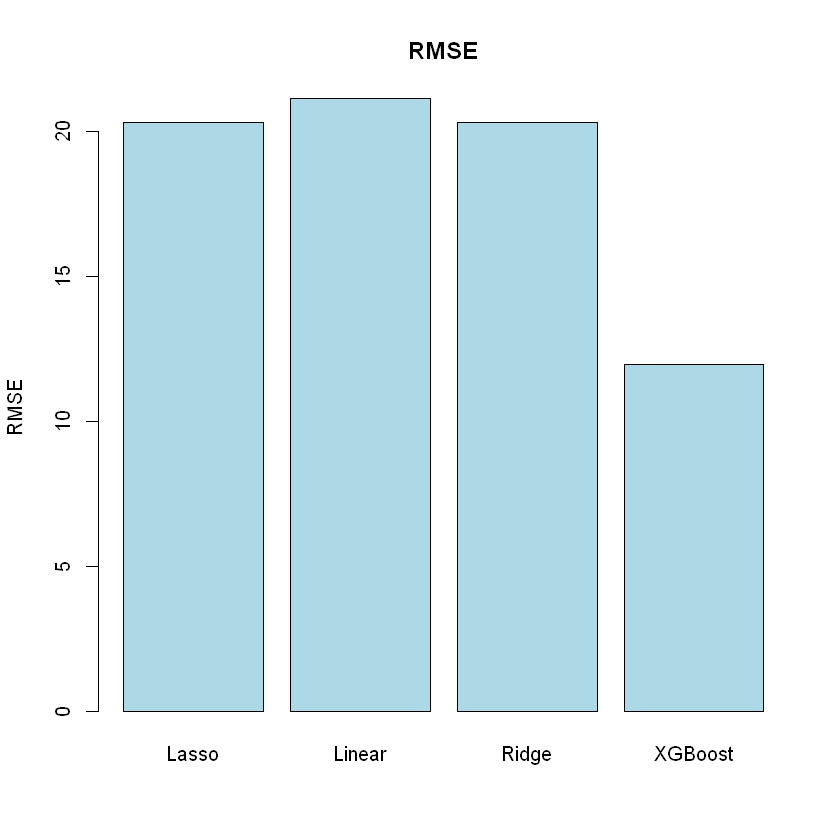

In [68]:
barplot(rmse,main="RMSE", 
   names.arg=c("Lasso", "Linear", "Ridge","XGBoost"),ylab='RMSE',col='lightblue')

We can see that RMSE is the least for XGBoost followed by Ridge, Lasso and multiple linear model.

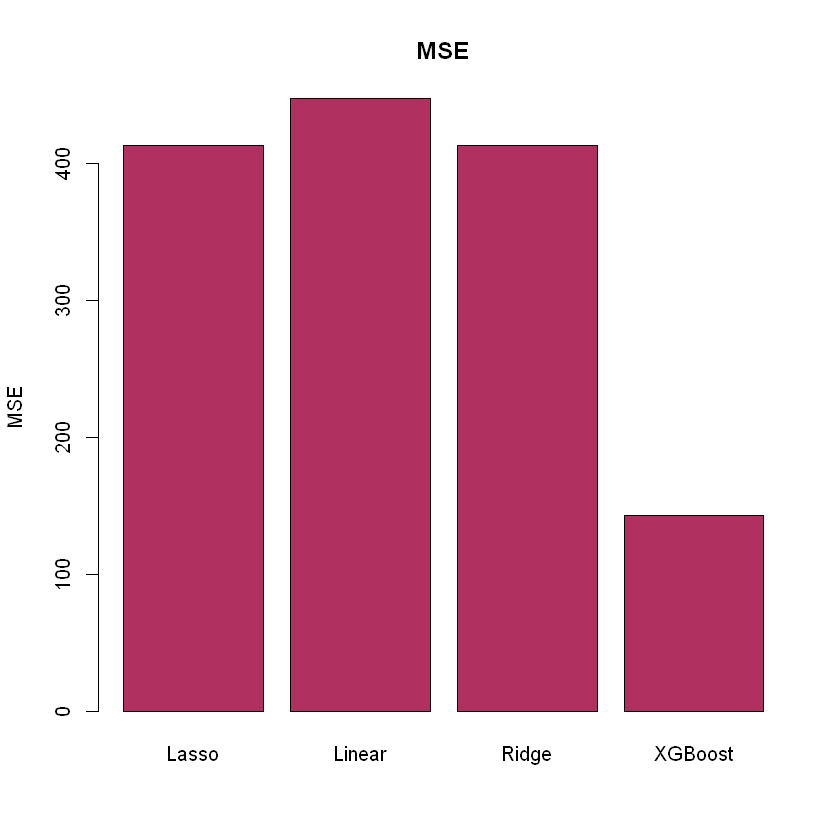

In [69]:
barplot(mse,main="MSE", 
   names.arg=c("Lasso", "Linear", "Ridge","XGBoost"),ylab='MSE',col='maroon')

The same trend follows for MSE as well.

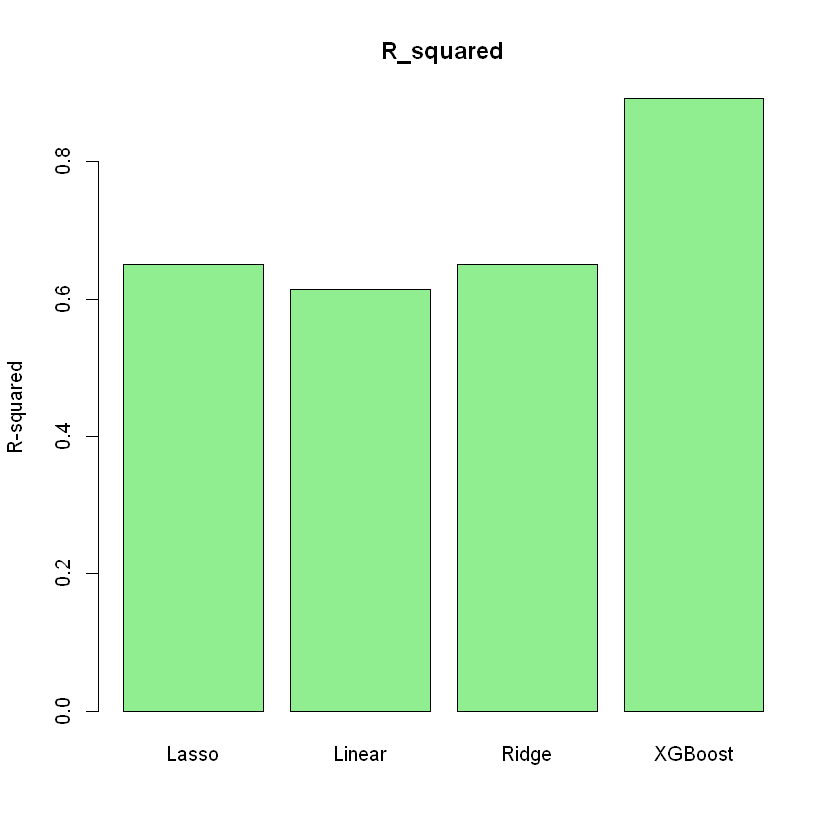

In [70]:
barplot(r_squared,main="R_squared", 
   names.arg=c("Lasso", "Linear", "Ridge","XGBoost"),ylab='R-squared',col='lightgreen')

XGBoost seems to have the highest R_squared(around 0.9), followed by ridge and lasso and linear regression models. Thus summarizing our model comparison phase, we can say that 

 - XGBoost performs the best in comparison with the other models.
 - Lasso and Ridge regression have almost the same performance with Ridge performing better than Lasso.
 - Multiple linear model performs the worst in comparison with the other 3 models.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

#### In concusion, we can confirm that the foundings in the paper were verified ,i.e. performance of XGBoost for predicting critical temperature is much better when compared to other models. However, it seems that lasso and ridge regression mayhave been better model candidates when compared to the linear regression model as they perform much better when compared to linear model. 

Thus by selecting the below features,
- mean_atomic_mass
- wtd_range_atomic_mass
- std_atomic_mass
- mean_fie
- wtd_gmean_fie
- wtd_range_fie
- gmean_atomic_radius
- wtd_range_atomic_radius
- std_atomic_radius
- mean_Density
- wtd_entropy_Density
- wtd_std_Density
- gmean_ElectronAffinity
- wtd_gmean_ElectronAffinity
- wtd_entropy_ElectronAffinity
- wtd_range_ElectronAffinity
- std_ElectronAffinity
- wtd_range_FusionHeat
- std_FusionHeat
- entropy_ThermalConductivity
- wtd_entropy_ThermalConductivity
- wtd_range_ThermalConductivity
- std_ThermalConductivity
- wtd_mean_Valence
- wtd_range_Valence
- wtd_std_Valence

and passing them to a XGBoost model, would be our best candidate to predict critical temperature of a superconductor.

## 7. References <a class="anchor" id="sec_7"></a>

https://www.r-bloggers.com/ridge-regression-and-the-lasso/ <br>
https://www.r-bloggers.com/variable-importance-plot-and-variable-selection/ <br>
https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/ <br>
